<a href="https://colab.research.google.com/github/dslidder/SMARTSign/blob/main/Transfer_Learning_Test_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import zipfile
import random
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [4]:
!gdown --id '1rxPSmvF8RAB9x5VMscBsnKxeBkzO8H7S'

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1rxPSmvF8RAB9x5VMscBsnKxeBkzO8H7S
To: /content/kaggle.json
100% 64.0/64.0 [00:00<00:00, 117kB/s]


In [5]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download grassknoted/asl-alphabet

!unzip asl-alphabet

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [6]:
! rm -rf asl-alphabet.zip

In [7]:
try:
    os.mkdir('/tmp/asldata')
    os.mkdir('/tmp/asldata/train')
    os.mkdir('/tmp/asldata/test')
except OSError:
  pass

In [8]:
try:   
    os.mkdir('/tmp/asldata/train/A')
    os.mkdir('/tmp/asldata/train/B')
    os.mkdir('/tmp/asldata/train/C')
    os.mkdir('/tmp/asldata/train/D')
    os.mkdir('/tmp/asldata/train/E')
    os.mkdir('/tmp/asldata/train/F')
    os.mkdir('/tmp/asldata/train/G')
    os.mkdir('/tmp/asldata/train/H')
    os.mkdir('/tmp/asldata/train/I')
    os.mkdir('/tmp/asldata/train/J')
    os.mkdir('/tmp/asldata/train/K')
    os.mkdir('/tmp/asldata/train/L')
    os.mkdir('/tmp/asldata/train/M')
    os.mkdir('/tmp/asldata/train/N')
    os.mkdir('/tmp/asldata/train/O')
    os.mkdir('/tmp/asldata/train/P')
    os.mkdir('/tmp/asldata/train/Q')
    os.mkdir('/tmp/asldata/train/R')
    os.mkdir('/tmp/asldata/train/S')
    os.mkdir('/tmp/asldata/train/T')
    os.mkdir('/tmp/asldata/train/U')
    os.mkdir('/tmp/asldata/train/V')
    os.mkdir('/tmp/asldata/train/W')
    os.mkdir('/tmp/asldata/train/X')
    os.mkdir('/tmp/asldata/train/Y')
    os.mkdir('/tmp/asldata/train/Z')
    os.mkdir('/tmp/asldata/train/space')
    os.mkdir('/tmp/asldata/train/nothing')
except OSError:
  pass

In [9]:
try:
    os.mkdir('/tmp/asldata/test/A')
    os.mkdir('/tmp/asldata/test/B')
    os.mkdir('/tmp/asldata/test/C')
    os.mkdir('/tmp/asldata/test/D')
    os.mkdir('/tmp/asldata/test/E')
    os.mkdir('/tmp/asldata/test/F')
    os.mkdir('/tmp/asldata/test/G')
    os.mkdir('/tmp/asldata/test/H')
    os.mkdir('/tmp/asldata/test/I')
    os.mkdir('/tmp/asldata/test/J')
    os.mkdir('/tmp/asldata/test/K')
    os.mkdir('/tmp/asldata/test/L')
    os.mkdir('/tmp/asldata/test/M')
    os.mkdir('/tmp/asldata/test/N')
    os.mkdir('/tmp/asldata/test/O')
    os.mkdir('/tmp/asldata/test/P')
    os.mkdir('/tmp/asldata/test/Q')
    os.mkdir('/tmp/asldata/test/R')
    os.mkdir('/tmp/asldata/test/S')
    os.mkdir('/tmp/asldata/test/T')
    os.mkdir('/tmp/asldata/test/U')
    os.mkdir('/tmp/asldata/test/V')
    os.mkdir('/tmp/asldata/test/W')
    os.mkdir('/tmp/asldata/test/X')
    os.mkdir('/tmp/asldata/test/Y')
    os.mkdir('/tmp/asldata/test/Z')
    os.mkdir('/tmp/asldata/test/space')
    os.mkdir('/tmp/asldata/test/nothing')
except OSError:
  pass

In [10]:
! rm -rf asl_alphabet_train/asl_alphabet_train/del

In [11]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
      for image in os.listdir(SOURCE + filename):
        file = SOURCE + filename + "/" + image
        if os.path.getsize(file) > 0:
            files.append(filename + "/" + image)
        else:
            print(image + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


Source_DIR = "asl_alphabet_train/asl_alphabet_train/"
Training_DIR = "/tmp/asldata/train/"
Testing_DIR = "/tmp/asldata/test/"

split_size = .9
split_data(Source_DIR, Training_DIR, Testing_DIR, split_size)


In [12]:
base_dir = '/tmp/asldata'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(112, 112),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(112, 112),
        batch_size=20,
        class_mode='categorical')

Found 75600 images belonging to 28 classes.
Found 8400 images belonging to 28 classes.


In [ ]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(16, (2,2), activation='relu', input_shape=(112, 112, 3)),
#   tf.keras.layers.MaxPooling2D(2, 2),
#   tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2, 2),
#   tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2, 2),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(138, activation='relu'),
#   tf.keras.layers.Dense(28, activation='softmax')
# ])

# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(train_generator, epochs=20, validation_data=validation_generator,steps_per_epoch=100,validation_steps=50,verbose=1)

In [14]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD


base_model = InceptionV3(weights='imagenet', include_top=False) # create the base pre-trained model

x = base_model.output
x = GlobalAveragePooling2D()(x) # add a global spatial average pooling layer
x = Dense(1024, activation='relu')(x) # let's add a fully-connected layer

predictions = Dense(28, activation='softmax')(x) # and a logistic layer -- let's say we have 200 classes


model = Model(inputs=base_model.input, outputs=predictions) # this is the model we will train

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit(train_generator, epochs=20, validation_data=validation_generator,steps_per_epoch=100,validation_steps=50,verbose=1)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
 #    #for i, layer in enumerate(base_model.layers):
 #      #print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate

model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=50, validation_data=validation_generator,steps_per_epoch=100,validation_steps=50,verbose=1)


87924736/87910968 [==============================] - 0s 0us/step
Epoch 1/20
100/100 [==============================] - 20s 58ms/step - loss: 2.5976 - val_loss: 1.6118
Epoch 2/20
100/100 [==============================] - 5s 46ms/step - loss: 1.3040 - val_loss: 1.0794
Epoch 3/20
100/100 [==============================] - 5s 47ms/step - loss: 0.9262 - val_loss: 1.1860
Epoch 4/20
100/100 [==============================] - 5s 46ms/step - loss: 0.8903 - val_loss: 0.7509
Epoch 5/20
100/100 [==============================] - 5s 47ms/step - loss: 0.7266 - val_loss: 0.6099
Epoch 6/20
100/100 [==============================] - 5s 46ms/step - loss: 0.6513 - val_loss: 0.6020
Epoch 7/20
100/100 [==============================] - 5s 46ms/step - loss: 0.5825 - val_loss: 0.5735
Epoch 8/20
100/100 [==============================] - 5s 51ms/step - loss: 0.4902 - val_loss: 0.4651
Epoch 9/20
100/100 [==============================] - 5s 46ms/step - loss: 0.5221 - val_loss: 0.4543
Epoch 10/20
100/100 [====

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


100/100 [==============================] - 12s 63ms/step - loss: 1.4279 - accuracy: 0.5910 - val_loss: 1.9393 - val_accuracy: 0.6320
Epoch 2/50
100/100 [==============================] - 5s 51ms/step - loss: 0.8114 - accuracy: 0.7485 - val_loss: 0.6429 - val_accuracy: 0.8290
Epoch 3/50
100/100 [==============================] - 5s 50ms/step - loss: 0.5406 - accuracy: 0.8280 - val_loss: 0.4765 - val_accuracy: 0.8580
Epoch 4/50
100/100 [==============================] - 5s 50ms/step - loss: 0.5376 - accuracy: 0.8255 - val_loss: 0.3656 - val_accuracy: 0.8970
Epoch 5/50
100/100 [==============================] - 5s 50ms/step - loss: 0.4045 - accuracy: 0.8650 - val_loss: 0.3118 - val_accuracy: 0.8980
Epoch 6/50
100/100 [==============================] - 5s 50ms/step - loss: 0.3619 - accuracy: 0.8860 - val_loss: 0.2973 - val_accuracy: 0.9170
Epoch 7/50
100/100 [==============================] - 5s 50ms/step - loss: 0.3140 - accuracy: 0.9005 - val_loss: 0.3784 - val_accuracy: 0.9130
Epoch 8/5

Text(0.5, 1.0, 'Training and validation loss')

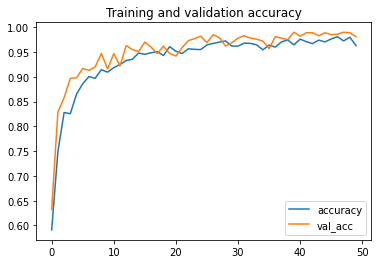

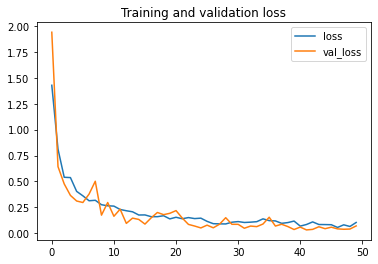

In [15]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

plt.plot(epochs, acc, label = 'accuracy')
plt.plot(epochs, val_acc, label = 'val_acc')
plt.legend()
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, label = 'loss')
plt.plot(epochs, val_loss, label = 'val_loss')
plt.legend()
plt.title('Training and validation loss')